In [2]:
inference_path = 'inference_model'

# Name of model you Fine Tuned on
pipe_name ="runwayml/stable-diffusion-v1-5"


In [3]:
import torch
from diffusers import StableDiffusionPipeline

# This will output the model structure to our inference area
pipe = StableDiffusionPipeline.from_pretrained(pipe_name, torch_dtype=torch.float16)
pipe.save_pretrained(inference_path)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [6]:
# Replace this with whichever model you'd like to inference
trained_model = "out/checkpoint-500/text_encoder/diffusion_pytorch_model.bin"
!cp {trained_model} {inference_path}/unet

  0%|          | 0/50 [00:00<?, ?it/s]

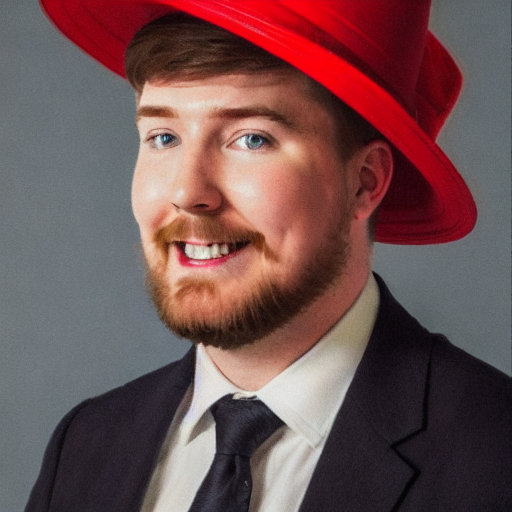

In [31]:
# This performs inference
pipe = StableDiffusionPipeline.from_pretrained(inference_path, torch_dtype=torch.float16)
pipe.to("cuda")

image = pipe(prompt="mr beast with a large hat").images[0]
image